### CasCadeClassifier
- opencv에서 제공하는 이미지 검출용 분류 알고리즘
- 어떤 것을 검출할지에 대한 데이터가 담긴 cascade 파일을 지정하여 원하는 대상을 검출할 수 있는 알고리즘
- 검출 대상이 달라진다고 해서 코드가 달라지는 부분은 거의 없으며 검출 대상에 맞는 cascade 파일을 지정하면 된다.

In [2]:
import cv2
import sys
import matplotlib.pyplot as plt

In [3]:
# 이미지 파일
image_file = '../images/photo/avengers.jpg'

In [4]:
# cascade 파일 지정
# 검출하고자 하는 대상에 대한 casecade 파일 복사
cascade_file = 'haarcascade_frontalface_alt.xml'

In [5]:
# Casecase Classifier 생성
model = cv2.CascadeClassifier(cascade_file)

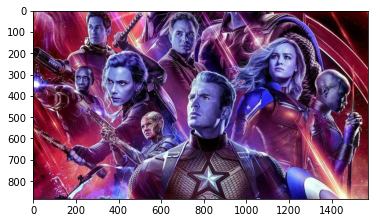

In [6]:
# 이미지를 불러온다.
image = cv2.imread(image_file)
plt.imshow(image)
plt.show()

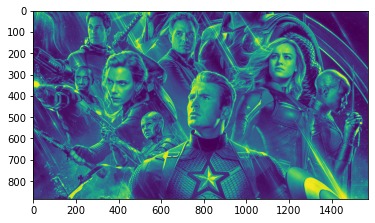

In [7]:
# 검출 효과를 높이기 위한 한가지 색상 형태로 변환한다 (그레이스케일)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gs)
plt.show()

In [8]:
# 얼굴 인식을 시작한다.
# minSize : 얼굴을 찾기 위한 최소 영역의 크기
# minNeighbors : 최소 이웃 색상의 수, 낮을 수록 정밀하게 탐색한다.
face_list = model.detectMultiScale(image_gs, 
                                   minSize=(100,100),
                                   minNeighbors = 1,
                                   scaleFactor=1.1)
face_list

array([[ 232,   36,  117,  117],
       [1089,  160,  147,  147],
       [ 174,  273,  115,  115],
       [ 638,   58,  141,  141],
       [ 296,  271,  184,  184],
       [ 674,  332,  197,  197]], dtype=int32)

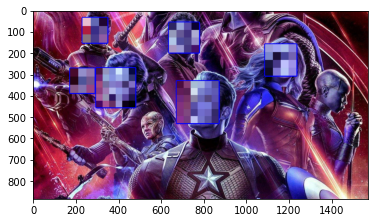

In [9]:
# 찾을 얼굴이 있다면
if len(face_list) > 0:
    # 영역 색상
    color = (0,0,255)
    
    # 얼굴의 수만큼 반복
    for face in face_list:
        # 영역값을 추출한다.
        x,y,w,h = face
        
        # 네모를 그린다,
        cv2.rectangle(image, (x,y), (x+w, y+w), color, thickness=8)
        
        # 모자이크 처리
        # 얼굴 영역의 이미지를 가져온다.
        face_img = image[y:y+h,x:x+w]
        # 자른 이미지를 축소한다.
        face_img = cv2.resize(face_img, (w // 30, h // 30))
        # 원래 크기로 확대한다.
        face_img = cv2.resize(face_img, (w, h), interpolation=cv2.INTER_AREA)
        # 원래 얼굴 위치에 덮어준다.
        image[y:y+h, x:x+h] = face_img
        
        
    plt.imshow(image)
    plt.show()
    
    # 이미지를 파일로 저장한다.
    cv2.imwrite('cv2_result.png', image)
        

### 실습해보기

In [9]:
# 이미지 파일
image_file1 = '../images/photo/friend.jpg'

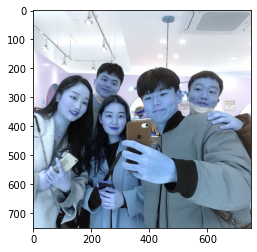

In [10]:
# 이미지를 불러온다.
image1 = cv2.imread(image_file1)
plt.imshow(image1)
plt.show()

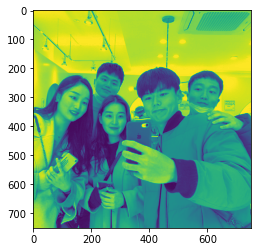

In [11]:
# 검출 효과를 높이기 위한 한가지 색상 형태로 변환한다 (그레이스케일)
image_gs1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gs1)
plt.show()

In [22]:
# 얼굴 인식을 시작한다.
# minSize : 얼굴을 찾기 위한 최소 영역의 크기
# minNeighbors : 최소 이웃 색상의 수, 낮을 수록 정밀하게 탐색한다.
face_list1 = model.detectMultiScale(image_gs1, 
                                   minSize=(100,100),
                                   minNeighbors = 1,
                                   scaleFactor=1.1)
face_list2 = face_list1[1]
face_list2

array([532, 231, 118, 118], dtype=int32)

In [21]:
# 찾을 얼굴이 있다면
if len(face_list2) > 0:
    # 영역 색상
    color = (0,0,255)
    
    # 얼굴의 수만큼 반복
    for face in face_list2:
        # 영역값을 추출한다.
        x,y,w,h = face
        
        # 네모를 그린다,
        cv2.rectangle(image1, (x,y), (x+w, y+w), color, thickness=8)
        
        # 모자이크 처리
#         # 얼굴 영역의 이미지를 가져온다.
#         face_img = image[y:y+h,x:x+w]
#         # 자른 이미지를 축소한다.
#         face_img = cv2.resize(face_img, (w // 30, h // 30))
#         # 원래 크기로 확대한다.
#         face_img = cv2.resize(face_img, (w, h), interpolation=cv2.INTER_AREA)
#         # 원래 얼굴 위치에 덮어준다.
#         image[y:y+h, x:x+h] = face_img
        
        
    plt.imshow(image1)
    plt.show()
    
    # 이미지를 파일로 저장한다.
    cv2.imwrite('cv2_friend1.png', image1)

TypeError: cannot unpack non-iterable numpy.intc object